In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

In [15]:
df_model = pd.read_csv("../inter_data/processed_catboost.csv")


In [16]:
df_model = pd.read_csv("../inter_data/processed_catboost.csv")
df_model = df_model[list(col for col in df_model.columns if "Unnam" not in col)]

## Loading the model

In [17]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier()      # parameters not required.
cat_clf.load_model('../models/catboost_classifier')

## Shap value analysis

In [6]:
df = df_model.copy() # coying the processed data
X = df.drop("target", axis=1)
y = df["target"]

# removing client_code
X = X.drop("client_code", axis = 1)

X["IsKarvy"] = X["IsKarvy"].astype(int)
X["Z20"] = X["Z20"].astype(int)

In [11]:
# importing shap library
import shap


explainer = shap.TreeExplainer(cat_clf)
shap_values = explainer.shap_values(X)

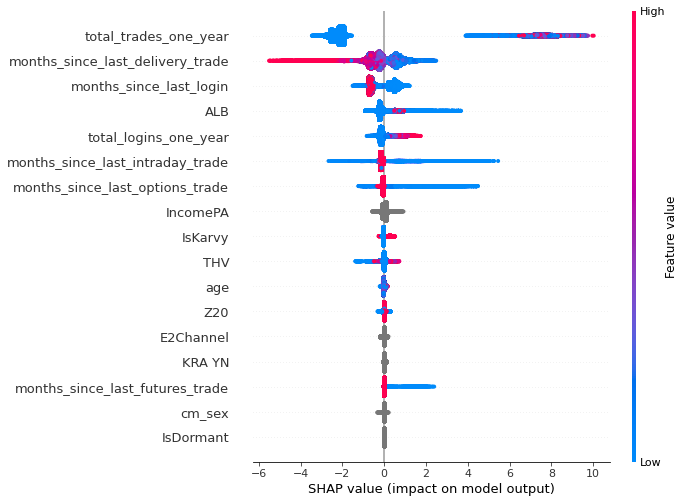

In [12]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

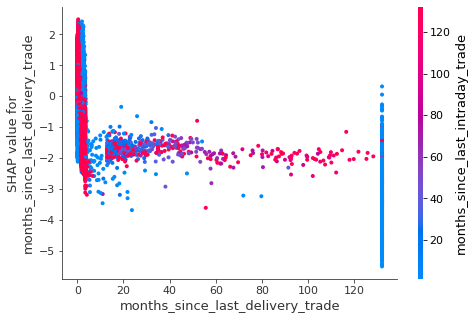

In [13]:
shap.dependence_plot("months_since_last_delivery_trade", shap_values, X)


## karvy clients not traded post ETF

In [32]:
## Karvy clients and not traded
df = df_model[(df_model["IsKarvy"] == 1) & (df_model["target"] == 0)]

In [33]:
df

,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target
157,62720305,N,1.0,M,5_10L,N,Franchisee,49.0,2.094344,132.0,132.0,132.0,3.441394,0.0,-26.20,0.0,95.0,2.0,0.0
203,IJACO324,N,1.0,M,5_10L,N,Premia,55.0,0.188761,132.0,132.0,132.0,3.474249,12982.0,0.74,0.0,343.0,2.0,0.0
240,K8260291,N,1.0,M,5_10L,N,CAT,35.0,3.112845,132.0,132.0,132.0,3.441394,0.0,-26.19,0.0,73.0,2.0,0.0
465,KL259376,N,1.0,M,5_10L,N,CAT,77.0,132.000000,132.0,132.0,132.0,3.441394,0.0,-28.19,0.0,16.0,2.0,0.0
536,ASHVICHA,N,1.0,F,<=1L,N,Franchisee,35.0,3.342830,132.0,132.0,132.0,3.474249,30.0,0.55,0.0,30.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320610,RAMNEEKU,N,1.0,M,5_10L,N,CAT,69.0,0.155906,132.0,132.0,132.0,0.418745,82316.0,61324.77,0.0,26.0,6.0,0.0
320613,VANDSHA6,N,1.0,F,5_10L,N,Franchisee,50.0,0.155906,132.0,132.0,132.0,0.155906,40.0,115.40,0.0,20.0,2.0,0.0
320615,BAJRANDE,N,1.0,M,5_10L,N,Franchisee,26.0,0.155906,132.0,132.0,132.0,0.188761,809.0,303.99,0.0,49.0,5.0,0.0
320616,JITENMAD,N,1.0,M,5_10L,N,Franchisee,50.0,0.155906,132.0,132.0,132.0,0.221616,30.0,25.69,0.0,18.0,2.0,0.0


In [34]:
X = df.drop("target", axis=1)
y = df["target"]

# removing client_code
X = X.drop("client_code", axis = 1)

X["IsKarvy"] = X["IsKarvy"].astype(int)
X["Z20"] = X["Z20"].astype(int)


In [44]:
y_pred = cat_clf.predict(X)

In [48]:
results = pd.DataFrame({'Converted':y, 'Converted_prob':y_pred, "prospect_ID": y.index})


In [55]:
df_shortlist = df.loc[list(results[results["Converted_prob"] == 1]["prospect_ID"])]
bins = [0, 35, 50, 100]
df_shortlist['age_binned'] = pd.cut(df_shortlist['age'], bins)

In [58]:
pd.DataFrame(df_shortlist["age_binned"].value_counts())

,age_binned
"(35, 50]",315
"(50, 100]",303
"(0, 35]",239


## Probable clients shortlisting

In [18]:
X = df.drop("target", axis=1)
y = df["target"]

# removing client_code
X = X.drop("client_code", axis = 1)

X["IsKarvy"] = X["IsKarvy"].astype(int)
X["Z20"] = X["Z20"].astype(int)


In [19]:
y_pred = cat_clf.predict(X)

In [20]:
results = pd.DataFrame({'Converted':y, 'Converted_prob':y_pred, "prospect_ID": y.index})


In [23]:
df_shortlist = df.loc[list(results[results["Converted_prob"] == 1]["prospect_ID"])]
df_shortlist = df_shortlist[df_shortlist["target"] == 0]

In [30]:
from datetime import date
  



try: 
    !mkdir ../results
except:
    pass

df_shortlist.to_csv("../results/shortlist{}.csv".format(today))

mkdir: ../results: File exists


In [31]:
df_shortlist

,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target
932,97512672,Y,0.0,M,<=1L,N,CAT,22.0,0.188761,132.000000,132.000000,132.000000,2.751442,0.0,-13.00,1.0,21.0,3.0,0.0
1266,45973353,N,0.0,M,<=1L,N,CAT,39.0,0.155906,132.000000,132.000000,132.000000,3.244265,0.0,449.95,1.0,66.0,4.0,0.0
1314,34990493,Y,0.0,M,<=1L,N,CAT,23.0,2.028634,132.000000,132.000000,3.244265,3.244265,0.0,-28.51,1.0,92.0,6.0,0.0
1553,13127366,Y,0.0,M,<=1L,N,CAT,26.0,0.845858,132.000000,132.000000,3.342830,3.244265,0.0,-25.87,1.0,60.0,6.0,0.0
1629,41896690,N,0.0,M,<=1L,N,CAT,19.0,1.075843,132.000000,132.000000,3.342830,3.244265,0.0,-18.46,1.0,32.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320625,92657381,N,0.0,M,5_10L,N,others,20.0,0.155906,132.000000,132.000000,132.000000,0.188761,0.0,10675.53,1.0,1115.0,9.0,0.0
320626,KIRAN050,N,0.0,M,1_5L,N,Franchisee,62.0,0.155906,43.261514,0.155906,0.583019,7.383980,0.0,14254.41,0.0,1579.0,1095.0,0.0
320628,79307640,Y,0.0,M,5_10L,N,CAT,39.0,0.155906,132.000000,132.000000,132.000000,0.484455,0.0,4505.90,1.0,356.0,4.0,0.0
320629,57268114,Y,0.0,M,5_10L,N,Franchisee,36.0,0.155906,132.000000,132.000000,1.798650,1.404391,0.0,410.63,1.0,1625.0,125.0,0.0
